# Predicting The Sales Price of BullDozers Using Machine Learning

**Steps**

1. Problem Definition: Predciting the future sales prices of bulldozers, given it's characterstics and prices of previous bulldozers
2. Data: The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data
         Train.csv - Sales examples up to 2011 (400k examples with 50+ attributes)
         Valid.csv - Sales examples from January 1 2012 to April 30 2012 (12k exmples)
         Test.csv - Sales examples from May 1 2012 to November 2012 (12k examples)
4. Evaluation : The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

**Note**: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [5]:
#import both training and validation sets
df = pd.read_csv("data/TrainAndValid.csv", low_memory= False)
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

**Checking How Much Missing Data We Must Fill**

In [7]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [8]:
list(df.columns)

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'saledate',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

Attempting Exploratory Data Analysis, to see which year the most bulldozers were sold in

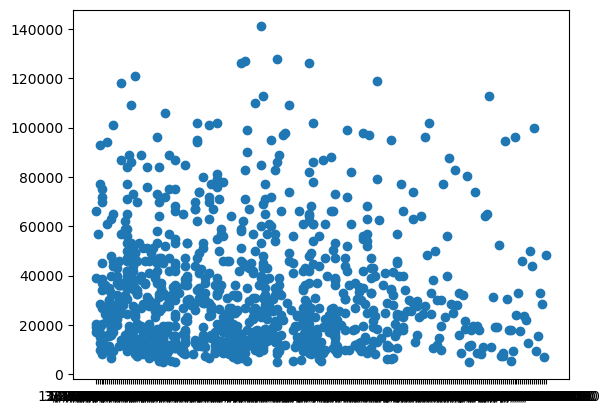

In [9]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
plt.show()

It's impossible to see the scatter plot, because matplotlib is trying to fit a 1000 entries into a small x-axis. The best thing to
do right now is to use parse date and convert the string to datetime objects, and by doing that graphing becomes easier

<Axes: ylabel='Frequency'>

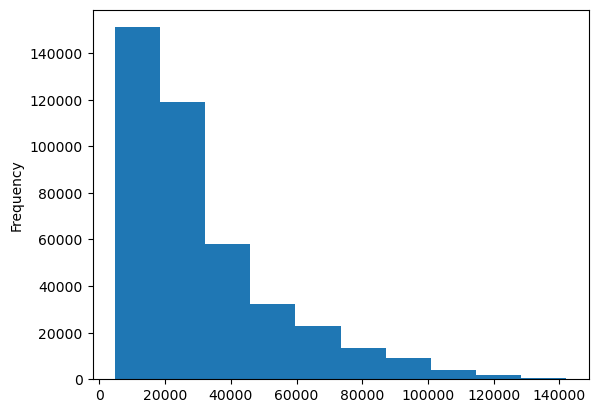

In [10]:
df.SalePrice.plot.hist()

In [12]:
#This Histogram Tells us, the cheapest bulldozers sold the most, which is already intuitive

In [13]:
df = pd.read_csv("data/TrainAndValid.csv", low_memory = False, parse_dates= ["saledate"])

In [14]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


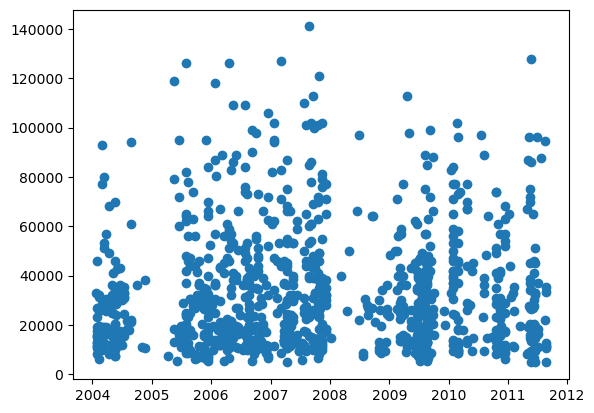

In [16]:
#Now we can plot the data

fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
plt.show()

Our scatter plot comparing years sold vs price levels is much more sophisticated now, since we've parsed the dates
and we're no longer trying to fit over 400,000 dates on the x-axis

In [17]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

**Sorting DataFrame by SaleDate**

Because the data is timeseries data


In [18]:
df.sort_values(by =  "saledate", inplace= True, ascending=True)
df

#Wouldn't be able to do this if saledate was a string object, that's why we converted to datetime object

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [20]:
df_temp = df.copy()
#Copying over the dataframe incase we mess up the dataframe during the editing process

In [21]:
df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Engineering 

Add datetime parameteres for `saledate` column

In [22]:
df_temp["SaleMonth"] = df_temp.saledate.dt.month
df_temp["SaleDay"] = df_temp.saledate.dt.day
df_temp["SaleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["SaleDayOfYear"] = df_temp.saledate.dt.day_of_year
df_temp["SaleYear"] = df_temp.saledate.dt.year

In [23]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfYear,SaleYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1,17,1,17,1989
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1,31,1,31,1989
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1,31,1,31,1989
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1,31,1,31,1989
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1,31,1,31,1989


In [24]:
df_temp.drop("saledate", axis = 1, inplace = True)

In [25]:
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

# Modelling

In [26]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1, random_state= 22)

x = df_temp.drop("SalePrice", axis = 1)
y = df_temp.SalePrice

#model.fit(x,y)

We can't fit the model, becuase:

1. Not all data is numbers
2. There's a bunch of missing values.

Fix both of those problems before fitting the model

In [27]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfYear,SaleYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1,17,1,17,1989
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1,31,1,31,1989
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1,31,1,31,1989
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1,31,1,31,1989
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1,31,1,31,1989


### Convert Strings to Categories

One way we can turn all our data into numbers is by converting them into pandas categories

In [28]:
#Find the columns that contain strings so we can convert them into categories.

#for name, content in df_temp.items():
 #   print(content)

In [29]:
df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfYear,SaleYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1,17,1,17,1989
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1,31,1,31,1989
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1,31,1,31,1989
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1,31,1,31,1989
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1,31,1,31,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,4,28,5,119,2012
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,4,28,5,119,2012
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,4,28,5,119,2012
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,4,28,5,119,2012


In [30]:
# Convert only NaN values to a string for all object columns
for col in df_temp.columns:
    df_temp[col] = df_temp[col].apply(lambda x: 'NaN' if pd.isna(x) else x)

#So when we iterate through our columnns, we can successfuly see which ones are strings, and then convert them into categories for our ML Model.

In [31]:
pd.api.types.is_string_dtype(df_temp.UsageBand)

True

In [32]:
for label, data in df_temp.items():
    if pd.api.types.is_string_dtype(data):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [33]:
#Converting All The String Values into Category Values

In [34]:
for name, data in df_temp.items():
    if pd.api.types.is_string_dtype(data):
        df_temp[name] = data.astype("category").cat.as_ordered()

In [35]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              412698 non-null  object  
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  412698 non-null  object  
 8   UsageBand                 412698 non-null  category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           412698 non-null  category
 12  fiModelSeries             412698 non-null  category
 13  fiModelDescriptor         412

In [36]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [37]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [38]:
#Now we've converted all our strings into categories.

#Now it's time to fill in the missing values

#So lets' convert all the string Nan's back into actual NaN's

In [39]:
df_temp = df_temp.replace('NaN', np.nan)

df_temp.isna().sum() / len(df_temp) * 100 #Let's us know what percentage of the values are missing

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

In [40]:
#Lets save this new dataframe into a CSV, since restarting and running all cells again, would take an eon

In [41]:
df_temp.to_csv("preprocessed-data.csv", index = False)

In [42]:
df_tmp = pd.read_csv("preprocessed-data.csv", low_memory= False,)
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfYear,SaleYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1,17,1,17,1989
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1,31,1,31,1989
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1,31,1,31,1989
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1,31,1,31,1989
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1,31,1,31,1989


# Filling The Missing Values

In [43]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

**Step 1: Fill Missing Numeric Values**

In [44]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleMonth
SaleDay
SaleDayOfWeek
SaleDayOfYear
SaleYear


In [45]:
name_cols_missing = []
for name,data in df_temp.items():
    if pd.api.types.is_numeric_dtype(data):
        if pd.isnull(data).sum(): #returns true if any value more than 0
            #print(name)
            name_cols_missing.append(name)

name_cols_missing



['auctioneerID', 'MachineHoursCurrentMeter']

#Filling Numeric Roles With The Median

In [46]:
for name, data in df_temp.items():
    if pd.api.types.is_numeric_dtype(data):
        if pd.isnull(data).sum():
            df_temp[name + "_missing_data"] = pd.isnull(data)
            df_temp[name].fillna(data.median(), inplace = True)

name_cols_missing = []
for name, data in df_temp.items():
    if pd.api.types.is_numeric_dtype(data):
        if pd.isnull(data).sum():
            name_cols_missing.append(name)

if name_cols_missing == []:
    print("No more numerical columns with missing values")
        

No more numerical columns with missing values


In [47]:
df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfYear,SaleYear,auctioneerID_missing_data,MachineHoursCurrentMeter_missing_data
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1,17,1,17,1989,False,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1,31,1,31,1989,False,True
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1,31,1,31,1989,False,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1,31,1,31,1989,False,True
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,1,31,1,31,1989,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,NaN,D38E,...,None or Unspecified,NaN,NaN,4,28,5,119,2012,False,True
412476,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,NaN,2064,...,NaN,NaN,NaN,4,28,5,119,2012,False,True
411927,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,NaN,337G,...,NaN,NaN,NaN,4,28,5,119,2012,False,True
407124,6266251,55000.0,509560,3357,149,99.0,1993,0.0,NaN,12G,...,NaN,NaN,NaN,4,28,5,119,2012,False,True


In [48]:
df_temp.auctioneerID_missing_data.value_counts()

auctioneerID_missing_data
False    392562
True      20136
Name: count, dtype: int64

In [49]:
missing_string_list = []
for name, data in df_temp.items():
    if pd.api.types.is_string_dtype(data):
        if pd.isnull(data).sum():
            #print(name)
            missing_string_list.append(name)


#Has printed out all the columns with missing values
missing_string_list

['UsageBand',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [50]:
missings_vals_list = []

for name, amount in df_temp.isna().sum().items():
    if amount > 0:
        missings_vals_list.append(name)

missings_vals_list

['UsageBand',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [51]:
if missing_string_list == missings_vals_list:
    print("All the values missing are categorical values")


All the values missing are categorical values


From this we can conclude that all the missing values are categorical values, therefore cateogrical values are the only ones we need to worry about fixing

In [52]:
for name, data in df_temp.items():
    if pd.api.types.is_string_dtype(data):
        if data.isnull().sum():
            print(name)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [53]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [54]:
df_temp.to_csv("processed_data.csv")

In [55]:
#Turn Categorical Variables into Numbers and Fill Missing

for name, data in df_temp.items():
    if pd.api.types.is_string_dtype(data):
        #Add Binary Column to indicate whether sample had missing values
        if data.isnull().sum():
            df_temp[name + "_is_missing"] = pd.isnull(data)
            # Fill in the missing values
            df_temp[name] = pd.Categorical(data).codes + 1
            


In [56]:
pd.Categorical(df_temp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [57]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 97 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   SalesID                                412698 non-null  int64   
 1   SalePrice                              412698 non-null  float64 
 2   MachineID                              412698 non-null  int64   
 3   ModelID                                412698 non-null  int64   
 4   datasource                             412698 non-null  int64   
 5   auctioneerID                           412698 non-null  float64 
 6   YearMade                               412698 non-null  int64   
 7   MachineHoursCurrentMeter               412698 non-null  float64 
 8   UsageBand                              412698 non-null  int8    
 9   fiModelDesc                            412698 non-null  category
 10  fiBaseModel                            41269

In [58]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [59]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 97, dtype: int64

1. All The Missing Data Has Been Filled.
2. All The Data Has Been Turned Numerical.

This means we can now fit a ML Model To Our Data

In [60]:
for x,y in df_temp.items():
    if not pd.api.types.is_numeric_dtype(y):
        df_temp[x] = pd.Categorical(df_temp[x]).codes

for x,y in df_temp.items():
    if not pd.api.types.is_numeric_dtype(y):
        print(x)

In [61]:
# Convert all boolean columns to integers
for col in df_temp.select_dtypes(include=['bool']).columns:
    df_temp[col] = df_temp[col].astype(int)

# Verify the conversion
print(df_temp.dtypes)


SalesID                           int64
SalePrice                       float64
MachineID                         int64
ModelID                           int64
datasource                        int64
                                 ...   
Backhoe_Mounting_is_missing       int32
Blade_Type_is_missing             int32
Travel_Controls_is_missing        int32
Differential_Type_is_missing      int32
Steering_Controls_is_missing      int32
Length: 97, dtype: object


In [62]:
%%time 
#Jupyter Magic Function to tell us how long this cell takes to run
x = df_temp.drop("SalePrice", axis = 1)
y = df_temp.SalePrice
model = RandomForestRegressor(n_jobs = -1, random_state= 0, max_samples= 10000)

CPU times: total: 78.1 ms
Wall time: 178 ms


In [63]:
#Splitting The Data into Training and Validation 

df_temp.SaleYear.value_counts().sort_index()

#Sort Index sorts it by index, in this case year, making it easy to spot 2012's data

SaleYear
1989     4806
1990     4529
1991     5109
1992     5519
1993     6303
1994     7929
1995     8530
1996     8829
1997     9785
1998    13046
1999    12793
2000    17415
2001    17594
2002    17246
2003    15254
2004    19879
2005    20463
2006    21685
2007    32208
2008    39767
2009    43849
2010    33390
2011    35197
2012    11573
Name: count, dtype: int64

In [64]:
df_val = df_temp[df_temp.SaleYear == 2012]
df_train = df_temp[df_temp.SaleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [65]:
x_train, y_train = df_train.drop("SalePrice", axis = 1), df_train.SalePrice
x_valid, y_valid = df_val.drop("SalePrice", axis = 1), df_val.SalePrice

In [66]:
%%time

model.fit(x_train, y_train)
model.score(x_train,y_train)

CPU times: total: 2min 2s
Wall time: 18.4 s


0.8607181246860999

Create an Evaluation Metric

In [67]:
from sklearn.metrics import mean_squared_log_error

y_preds = model.predict(x_valid)
y_true = y_valid

def root_mean_squared_log_error(y_true, y_pred):
    """
    Root Mean Squared Log Error: RMSLE scoring metric
    """
    return np.power(mean_squared_log_error(y_true = y_true, y_pred = y_preds), 0.5)

print(root_mean_squared_log_error(y_true = y_true, y_pred= y_preds))

0.2920113972142658


We're creating this, since this is the particular evaluation metric, that kaggle wants us to use

# Reducing Data

In [68]:
##Tesing The Model on a subset to tune hyperparameters, because we don't want to wait 5 minutes for the model to train each time

In [69]:
model = RandomForestRegressor(n_jobs = -1, random_state= 12, max_samples= 10000
                            )

In [70]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(x_train, y_train)

CPU times: total: 1min 44s
Wall time: 15.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=12)

In [71]:
model.score(x_valid, y_valid)

0.8339850091691071

# Hyperparamter Tuning

In [72]:
root_mean_squared_log_error(y_pred = model.predict(x_valid),y_true =  y_valid)

0.2920113972142658

# Hyperparameter Tuning

In [73]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

#Fit the RandomizedSearchCV model
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 21min 21s
Wall time: 45min 5s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [74]:
rs_model.score(x_valid, y_valid)

0.8187606023719853

In [75]:
model.score(x_valid, y_valid)

0.8339850091691071

In [76]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 9,
 'max_features': 'sqrt',
 'max_depth': None}

In [77]:
%%time 
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(x_train, y_train)

#Both of our models have subpar predction ability, so I combed through the internet to find these parameters, which seem to give a much better score than the other 2.


CPU times: total: 7min 22s
Wall time: 1min 19s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [78]:
ideal_model.score(x_valid, y_valid)

0.8807541601663205

In [79]:
def root_mean_squared_log_error(y_true, y_pred):
    """
    Root Mean Squared Log Error: RMSLE scoring metric
    """
    return np.power(mean_squared_log_error(y_true = y_true, y_pred = y_preds), 0.5)

In [80]:
root_mean_squared_log_error(y_true = y_valid, y_pred= ideal_model.predict(x_valid))

0.2920113972142658

In [81]:
#Same score as before, but atleast our coeff of determintation is better!

# Time To Make Predictions on Real Data Now

In [82]:
df_test = pd.read_csv("data/Test.csv", low_memory = False, parse_dates=  ["saledate"])
#Can't Make Predictions based on this dataset becuase it hasn't been processed

In [83]:
list(df.columns)[:]

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'saledate',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

Same 3 Types of preprocessing

1. Extract all the date information from the sale date, since it's a datetime objet now
2. Fill in all the missing numeric dtypes with median, and indiciate which row had missing data
3. Convert all the string dypes to categories, then fill the missing ones (-1) with 0's

In [84]:
df_test = pd.read_csv("data/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])

x = df_temp.drop("SalePrice", axis = 1)
y = df_temp.SalePrice

In [85]:
def preprocess_dataframe(df):
    df["SaleYear"] = df.saledate.dt.year
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleDay"] = df.saledate.dt.day
    df["SaleDayOfWeek"] = df.saledate.dt.dayofweek
    df["SaleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    for col in df.columns:
        df[col] = df[col].apply(lambda x: 'NaN' if pd.isna(x) else x)
    for name, data in df.items():
        if pd.api.types.is_string_dtype(data):
            df[name] = data.astype("category").cat.as_ordered()
    df = df.replace('NaN', np.nan)
    for name,data in df.items():
        if pd.api.types.is_numeric_dtype(data):
            if pd.isnull(data).sum(): #returns true if any value more than 0
                #print(name)
                name_cols_missing.append(name)
    for name, data in df.items():
        if pd.api.types.is_numeric_dtype(data):
            if pd.isnull(data).sum():
                df[name + "_missing_data"] = pd.isnull(data)
                df[name].fillna(data.median(), inplace = True)

    for name, data in df.items():
        if pd.api.types.is_string_dtype(data):
            #Add Binary Column to indicate whether sample had missing values
            if data.isnull().sum():
                df[name + "_is_missing"] = pd.isnull(data)
                # Fill in the missing values
                df[name] = pd.Categorical(data).codes + 1

    for x,y in df.items():
        if not pd.api.types.is_numeric_dtype(y):
            df[x] = pd.Categorical(df[x]).codes

    for x,y in df.items():
        if not pd.api.types.is_numeric_dtype(y):
            print(x)

    for col in df.select_dtypes(include=['bool']).columns:
        df[col] = df[col].astype(int)

    return df

In [86]:
df_train = pd.read_csv("data/TrainAndValid.csv", low_memory= False,  parse_dates=["saledate"])

In [87]:
# Ensure `saledate` transformations are applied consistently
df_train = preprocess_dataframe(df_train)
df_test = preprocess_dataframe(df_test)


In [88]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,498,179,...,1,1,1,1,1,1,1,1,1,1
1,1227844,1022817,7271,121,3,1000,28555.0,1,830,291,...,1,1,1,1,1,1,1,1,0,0
2,1227847,1031560,22805,121,3,2004,6038.0,3,1176,403,...,0,0,0,0,0,1,1,1,1,1
3,1227848,56204,1269,121,3,2006,8940.0,1,286,112,...,0,0,0,0,0,1,1,1,1,1
4,1227863,1053887,22312,121,3,2005,2286.0,2,565,195,...,1,1,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,712,234,...,0,0,0,0,0,1,1,1,1,1
12453,6643173,2558332,21434,149,2,2005,3525.0,0,185,79,...,0,0,0,0,0,1,1,1,1,1
12454,6643184,2558342,21437,149,2,1000,3525.0,0,324,122,...,0,0,0,0,0,1,1,1,1,1
12455,6643186,2558343,21437,149,2,2006,3525.0,0,324,122,...,0,0,0,0,0,1,1,1,1,1


In [89]:
set(x_train.columns) - set(df_test.columns)

{'auctioneerID_missing_data'}

Our Pre-Processed Data Lacks One Column, and We're Going To Fill it Up With all False Values, so it Doesn't Affect our Outcome

In [97]:
df_test["auctioneerID_missing_data"] = False
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_missing_data,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,498,179,...,1,1,1,1,1,1,1,1,False,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,830,291,...,1,1,1,1,1,1,0,0,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1176,403,...,0,0,0,1,1,1,1,1,False,False
3,1227848,56204,1269,121,3,2006,8940.0,1,286,112,...,0,0,0,1,1,1,1,1,False,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,565,195,...,1,1,1,0,0,0,1,1,False,False


In [98]:
df_train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,2,962,...,1,1,1,1,1,1,1,1,0,0
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,2,1744,...,1,1,1,1,1,1,1,1,0,0
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,1,335,...,1,1,1,1,1,1,1,1,1,1
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,1,3715,...,1,1,1,1,1,1,1,1,1,1
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,3,4260,...,1,1,1,1,1,1,1,1,1,1


In [99]:
set(df_test.columns) - set(x.columns)

set()

In [100]:
set(x.columns) - set(df_test.columns)


set()

In [101]:
set(x_train.columns) == set(df_test.columns)


False

In [102]:
%%time 
x = df_train.drop("SalePrice", axis = 1)
x["auctioneerID_is_missing"] = False
y = df_train.SalePrice


ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible
ideal_model.fit(x, y)


CPU times: total: 5min 23s
Wall time: 52.9 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [103]:
df_train.shape

(412698, 97)

In [104]:
df_test["auctioneerID_missing_data"] = False
df_test["auctioneerID_is_missing"] = False
df_test.shape

(12457, 97)

In [105]:
df_test = df_test[x.columns]

# Confirm the alignment
print("Column names and order are identical:", list(df_test.columns) == list(x.columns))

Column names and order are identical: True


In [106]:
ideal_model.predict(df_test)

array([18897.23645523, 17219.39266504, 48240.31655319, ...,
       13840.28013487, 16494.02889991, 26986.64809229])

In [107]:
#Format Predictions in The same Way That Kaggle Wants:

In [108]:
df_preds = pd.DataFrame()
df_preds ["SalesID"] = df_test["SalesID"]
df_preds ["Sales Price"] = ideal_model.predict(df_test)

In [109]:
df_preds

,SalesID,Sales Price
0,1227829,18897.236455
1,1227844,17219.392665
2,1227847,48240.316553
3,1227848,66150.767043
4,1227863,59646.090622
...,...,...
12452,6643171,44232.227039
12453,6643173,13718.135467
12454,6643184,13840.280135
12455,6643186,16494.028900


In [110]:
df_preds.to_csv("data/test_preds.csv", index = False)

# Feature Importance
**Which of the 97 Columns Were the Most Important For Predicting Our Target Column**

The higher, the more important the feature

In [111]:
len(ideal_model.feature_importances_)

97

In [112]:
x.shape[1]

97

In [113]:
def plot_features(columns, importances, n = 20):
    df = (pd.DataFrame({"features": columns, 
                       "feature_importances": importances}).sort_values("feature_importances", ascending= False).reset_index(drop = True))

    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importances")
    ax.invert_yaxis()

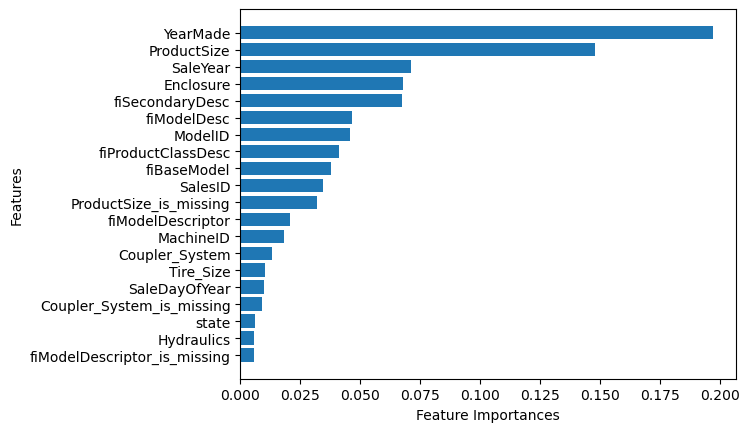

In [347]:
plot_features(x.columns, ideal_model.feature_importances_)